In [853]:
from PIL import Image, ImageDraw, ImageFilter, ImageOps
import numpy as np
import sys
from scipy.signal import find_peaks
np.set_printoptions(threshold=sys.maxsize)

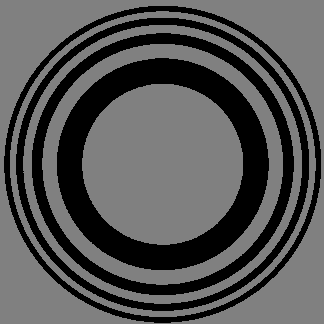

In [895]:
img = Image.open("img004.jpg")
img = ImageOps.posterize(img, 1)
display(img)

In [896]:
img.load()
width, height = img.size
r_array = np.empty([0,width])
pix_array = np.empty([0,width])

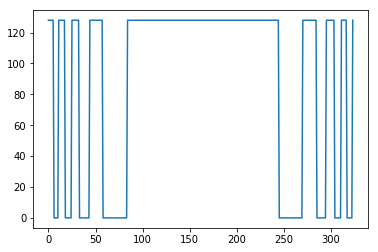

In [897]:
new_img = ImageDraw.Draw(img)
for i in range(width):
    r, g, b = img.getpixel((int(height/2),i))    
    r_array = np.append(r_array,r)
    pix_array = np.append(pix_array,i)
    
all_list = np.append(np.vstack(r_array),np.vstack(pix_array),axis=1)
plt.plot(all_list[:,1],all_list[:,0])
plt.show()

In [898]:
peaks, _ = find_peaks(all_list[:,0])
local_peaks = np.diff(peaks)

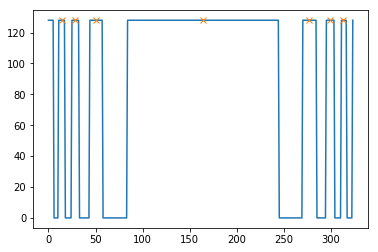

In [899]:
plt.plot(all_list[:,1],all_list[:,0])
plt.plot(peaks, all_list[:,0][peaks], "x")
plt.show()

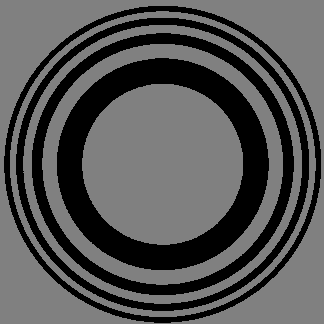

In [900]:
basic_img = ImageOps.posterize(img, 1)
display(basic_img)

In [901]:
color_img = basic_img
r_base, g_base, b_base = basic_img.getpixel((int(height/2),int(peaks[0]))) 
for i in range(np.size(peaks)):
    r, g, b = color_img.getpixel((int(height/2),int(peaks[i]))) 
    if r_base == r:
        ImageDraw.floodfill(color_img, xy=(int(height/2),int(peaks[i])), value=(255, i+1, 255, 255))

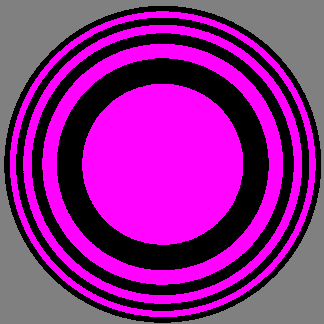

In [902]:
display(color_img)

In [903]:
fringe_num = np.empty([0,np.size(peaks)])
for i in range(np.size(peaks)):
    r, g, b = color_img.getpixel((int(height/2),int(peaks[i])))
    fringe_num = np.append(fringe_num,g)
display(fringe_num)

array([1., 2., 3., 4., 3., 2., 1.])

In [904]:
data_x = np.append(np.vstack(peaks),np.vstack(fringe_num),axis=1)
display(data_x)

array([[ 14.,   1.],
       [ 28.,   2.],
       [ 50.,   3.],
       [164.,   4.],
       [277.,   3.],
       [299.,   2.],
       [313.,   1.]])

In [905]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [906]:
rel = np.empty_like(data_x)
rel_new = np.empty_like(data_x)

In [907]:
left_edge = np.min(data_x[:,0])
right_edge = np.max(data_x[:,0])
delta = left_edge/(right_edge/2)
norm = right_edge/2
size = len(data_x)

In [908]:
for i in range(size):
    rel[i][0] = (data_x[i,0]/norm)-1-(delta/2)
    rel[i][1] = data_x[i,1]
    
display(rel)

array([[-9.55271565e-01,  1.00000000e+00],
       [-8.65814696e-01,  2.00000000e+00],
       [-7.25239617e-01,  3.00000000e+00],
       [ 3.19488818e-03,  4.00000000e+00],
       [ 7.25239617e-01,  3.00000000e+00],
       [ 8.65814696e-01,  2.00000000e+00],
       [ 9.55271565e-01,  1.00000000e+00]])

In [909]:
for i in range(size):
    rel_new[i][0] = (data_x[i,0]-left_edge)/((right_edge-left_edge)/2)-1
    rel_new[i][1] = data_x[i,1]
    
display(rel_new)

array([[-1.00000000e+00,  1.00000000e+00],
       [-9.06354515e-01,  2.00000000e+00],
       [-7.59197324e-01,  3.00000000e+00],
       [ 3.34448161e-03,  4.00000000e+00],
       [ 7.59197324e-01,  3.00000000e+00],
       [ 9.06354515e-01,  2.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00]])

In [910]:
x = np.linspace(-1,1,1000)
fit_x = poly.polyfit(rel_new[:,0],rel_new[:,1], 4)
wdf = poly.polyval(x, fit_x)

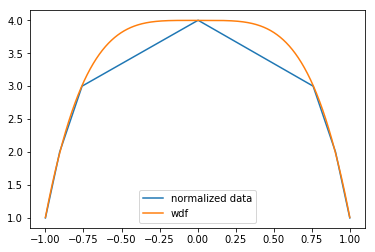

In [911]:
plt.plot(rel_new[:,0],rel_new[:,1])
plt.plot(x,wdf)
plt.legend(['normalized data','wdf'])
plt.show()

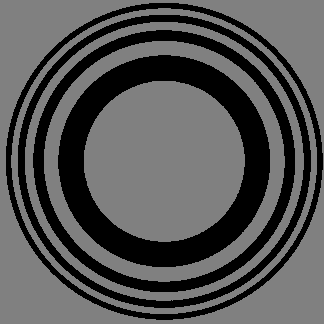

In [912]:
img = Image.open("img004.jpg").rotate(90)
img = ImageOps.posterize(img, 1)
display(img)

In [913]:
img.load()
width, height = img.size
r_array = np.empty([0,width])
pix_array = np.empty([0,width])

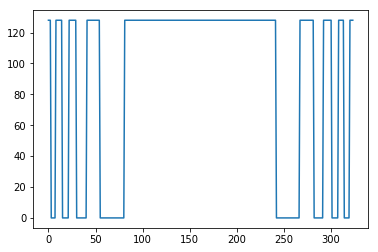

In [914]:
new_img = ImageDraw.Draw(img)
for i in range(width):
    r, g, b = img.getpixel((int(height/2),i))    
    r_array = np.append(r_array,r)
    pix_array = np.append(pix_array,i)
    
all_list = np.append(np.vstack(r_array),np.vstack(pix_array),axis=1)
plt.plot(all_list[:,1],all_list[:,0])
plt.show()

In [915]:
peaks, _ = find_peaks(all_list[:,0], distance = 10)
local_peaks = np.diff(peaks)

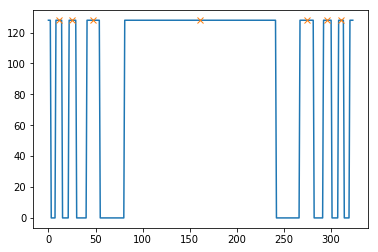

In [916]:
plt.plot(all_list[:,1],all_list[:,0])
plt.plot(peaks, all_list[:,0][peaks], "x")
plt.show()

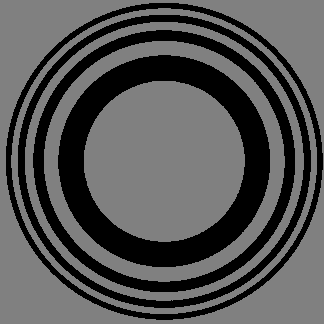

In [917]:
basic_img = ImageOps.posterize(img, 1)
display(basic_img)

In [918]:
color_img = basic_img
r_base, g_base, b_base = basic_img.getpixel((int(height/2),int(peaks[0]))) 
for i in range(np.size(peaks)):
    r, g, b = color_img.getpixel((int(height/2),int(peaks[i]))) 
    if r_base == r:
        ImageDraw.floodfill(color_img, xy=(int(height/2),int(peaks[i])), value=(255, i+1, 255, 255))

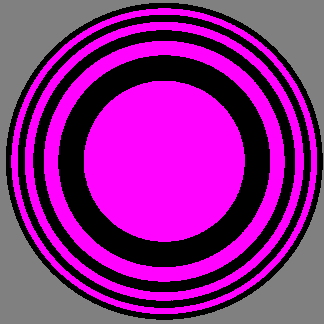

In [919]:
display(color_img)

In [920]:
fringe_num = np.empty([0,np.size(peaks)])
for i in range(np.size(peaks)):
    r, g, b = color_img.getpixel((int(height/2),int(peaks[i])))
    fringe_num = np.append(fringe_num,g)
display(fringe_num)

array([1., 2., 3., 4., 3., 2., 1.])

In [921]:
data_y = np.append(np.vstack(peaks),np.vstack(fringe_num),axis=1)
display(data_y)

array([[ 11.,   1.],
       [ 25.,   2.],
       [ 47.,   3.],
       [161.,   4.],
       [274.,   3.],
       [296.,   2.],
       [310.,   1.]])

In [922]:
rel = np.empty_like(data_y)
rel_new = np.empty_like(data_y)

In [923]:
left_edge = np.min(data_y[:,0])
right_edge = np.max(data_y[:,0])
delta = left_edge/(right_edge/2)
norm = right_edge/2
size = len(data_y)

In [924]:
for i in range(size):
    rel[i][0] = (data_y[i,0]/norm)-1-(delta/2)
    rel[i][1] = data_y[i,1]
    
display(rel)

array([[-9.64516129e-01,  1.00000000e+00],
       [-8.74193548e-01,  2.00000000e+00],
       [-7.32258065e-01,  3.00000000e+00],
       [ 3.22580645e-03,  4.00000000e+00],
       [ 7.32258065e-01,  3.00000000e+00],
       [ 8.74193548e-01,  2.00000000e+00],
       [ 9.64516129e-01,  1.00000000e+00]])

In [925]:
for i in range(size):
    rel_new[i][0] = (data_y[i,0]-left_edge)/((right_edge-left_edge)/2)-1
    rel_new[i][1] = data_y[i,1]
    
display(rel_new)

array([[-1.00000000e+00,  1.00000000e+00],
       [-9.06354515e-01,  2.00000000e+00],
       [-7.59197324e-01,  3.00000000e+00],
       [ 3.34448161e-03,  4.00000000e+00],
       [ 7.59197324e-01,  3.00000000e+00],
       [ 9.06354515e-01,  2.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00]])

In [926]:
x = np.linspace(-1,1,1000)
fit_y = poly.polyfit(rel_new[:,0],rel_new[:,1], 4)
wdf = poly.polyval(x, fit_y)

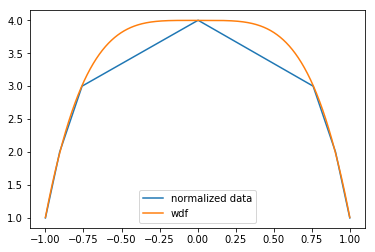

In [927]:
plt.plot(rel_new[:,0],rel_new[:,1])
plt.plot(x,wdf)
plt.legend(['normalized data','wdf'])
plt.show()

In [928]:
fit_y[0] = -1*fit_y[0]
fit_y[2] = -1*fit_y[2] 
a = fit_y
b = fit_x

In [929]:
display(fit_y)
display(a)
display(fit_x)
display(b)

array([-3.99748231e+00,  4.64956193e-05, -2.32018110e-02, -5.34520377e-05,
       -3.01280415e+00])

array([-3.99748231e+00,  4.64956193e-05, -2.32018110e-02, -5.34520377e-05,
       -3.01280415e+00])

array([ 3.99748231e+00,  4.64956193e-05,  2.32018110e-02, -5.34520377e-05,
       -3.01280415e+00])

array([ 3.99748231e+00,  4.64956193e-05,  2.32018110e-02, -5.34520377e-05,
       -3.01280415e+00])

In [930]:
W020 = ((a[2]+b[2])*(a[3]**2-b[3]**2)-(a[2]-b[2])*(a[3]**2+b[3]**2))/(2*(a[3]**2-b[3]**2))
W040 = (a[4]+b[4])/2;
W111y = a[1];
W131x = b[3];
W222x = ((a[2]-b[2])*b[3]**2)/(a[3]**2-b[3]**2);

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [931]:
display("W020: " + str(W020))
display("W040: " + str(W040))
display("W111x: " + str(W111y))
display("W131x: " + str(W131x))
display("W222x: " + str(W222x))

'W020: inf'

'W040: -3.012804147647124'

'W111x: 4.6495619268575724e-05'

'W131x: -5.345203774847962e-05'

'W222x: -inf'